# Praca domowa 3-WB

# Dane jakościowe

In [65]:
import numpy as np 
import pandas as pd 
import pydicom,os,cv2
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np 
import pandas as pd 
import pydicom,os,cv2
from glob import glob
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

import scipy.ndimage

import numpy as np 
import pandas as pd 
import pydicom,os,cv2
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [79]:
train_fns = sorted(glob('C:/Users/maaja/Desktop/AndrzejczukMaja/archive/siim/dicom-images-train/*/*/*.dcm'))
test_fns = sorted(glob('C:/Users/maaja/Desktop/AndrzejczukMaja/archive/siim/dicom-images-test/*/*/*.dcm'))
df = pd.read_csv('C:/Users/maaja/Desktop/AndrzejczukMaja/archive/siim/train-rle.csv')

Normal = sorted(glob('C:/Users/maaja/Desktop/AndrzejczukMaja/ZhangLabData/CellData/chest_xray/train/NORMAL/*.jpeg'))
Pneumonia = sorted(glob('C:/Users/maaja/Desktop/AndrzejczukMaja/ZhangLabData/CellData/chest_xray/train/PNEUMONIA/*.jpeg'))

tu jakies proby robienia ostrosci:

In [7]:
# importing useful libraries
import imquality.brisque as brisque
import PIL.Image
import matplotlib.pyplot as plt

In [11]:
image = cv2.imread(Pneumonia[1])
print("image-quality  {}".format(brisque.score(img)))

C:\Users\maaja\anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


image-quality  129.70968694253847


czy zdjęcia między klasami i między bazami danych się różnią czymś poza płucami 

raczej nie (?)

czy dużo zdjęć rozmazanych. sprawdzenie ostrości zdjęcia

In [60]:
from imutils import paths
import argparse
import cv2
import sys
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

sum_blurry = 0
sum_notblurry = 0
for i in range(len(Normal)):
    image = cv2.imread(Normal[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    if fm < 100:
        sum_blurry += 1
    else:
        sum_notblurry +=1

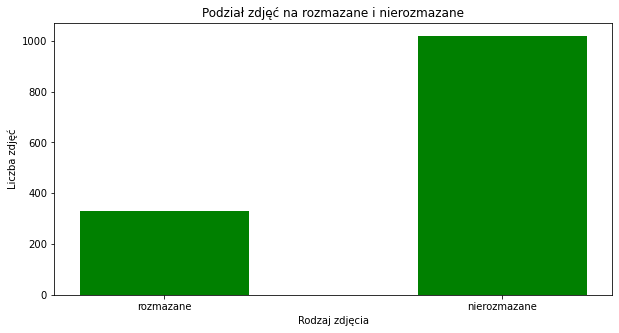

In [63]:
a = (sum_blurry, sum_notblurry)
b = ("rozmazane", "nierozmazane")
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(b, a, color ='green',
        width = 0.5)
plt.xlabel("Rodzaj zdjęcia")
plt.ylabel("Liczba zdjęć")
plt.title("Podział zdjęć na rozmazane i nierozmazane dla Normal")
plt.show()

In [65]:
sum_blurry = 0
sum_notblurry = 0
for i in range(len(Pneumonia)):
    image = cv2.imread(Pneumonia[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    if fm < 100:
        sum_blurry += 1
    else:
        sum_notblurry +=1

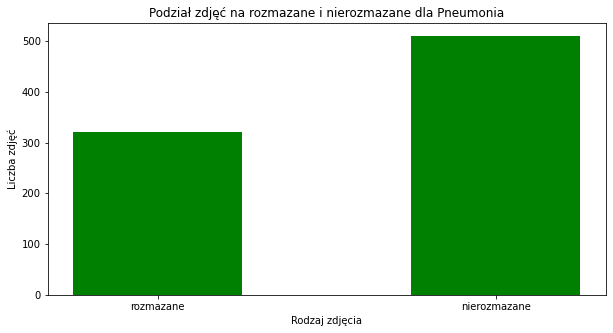

In [67]:
a = (sum_blurry, sum_notblurry)
b = ("rozmazane", "nierozmazane")
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(b, a, color ='green',
        width = 0.5)
plt.xlabel("Rodzaj zdjęcia")
plt.ylabel("Liczba zdjęć")
plt.title("Podział zdjęć na rozmazane i nierozmazane dla Pneumonia")
plt.show()

czy są artefakty (łańcuszki, guziki) na obrazach, przykłady - tylko pokaż może

Baza Pnumonia/normal

In [19]:
import cv2 as cv

zdj = cv2.imread(Pneumonia[40])
zdj2 = cv2.imread(Pneumonia[30])

tu widzimy śróbke

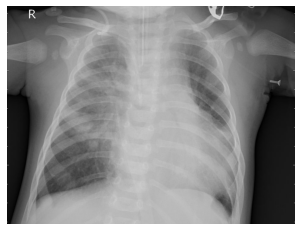

In [18]:
plt.imshow(zdj)
plt.axis("off")
plt.show()

czy jest aparatura medyczna (rurki, przewody) na zdjęciach

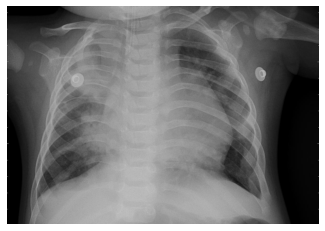

In [20]:
plt.imshow(zdj2)
plt.axis("off")
plt.show()

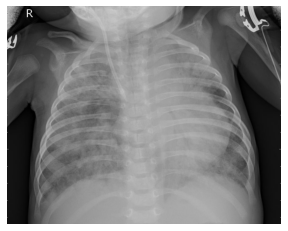

In [24]:
zdj3 = cv2.imread(Pneumonia[36])
plt.imshow(zdj3)
plt.axis("off")
plt.show()

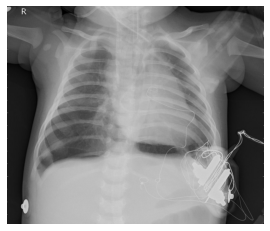

In [28]:
zdj3 = cv2.imread(Pneumonia[5])
plt.imshow(zdj3)
plt.axis("off")
plt.show()

Baza siim:

In [29]:
def plot_pixels(dataset, figsize=(8,8)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()


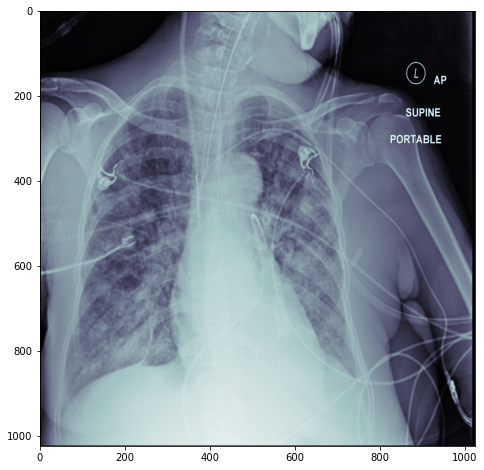

In [34]:
data = pydicom.dcmread(train_fns[3])
plot_pixels(data)

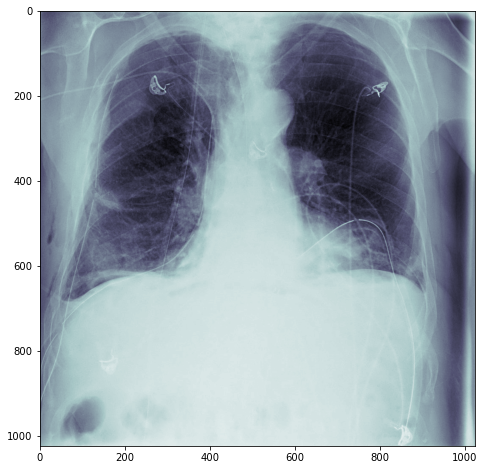

In [39]:
data = pydicom.dcmread(train_fns[13])
plot_pixels(data)

czy litery na obrazach, przykład; wykryć, czy występują litery na obrazku + kod do tego. ile tego jest?

są

czy mamy podstawy sądzić, że np. zaznaczono tylko jedną zmianę/chorobę zamiast wszystkich?uzasadnienie

nie wiem 

czy są dane osobowe (imię, nazwisko, data urodzenia)

w obu nie ma imienia ani nazwiska w siim jest wiek

czy zdjęcia są jedno czy trzy kanałowe

In [100]:
import os
from matplotlib import image
import collections

In [99]:
def check_n_channels(directory, threshold):
    shapes = []
    i = 0
    for file in os.listdir(directory):
        img = image.imread(directory+'/'+file)
        shapes.append(img.shape[-1] if img.ndim == 3 else 1)
        i += 1
        if i == threshold: break
    return collections.Counter(shapes)

In [102]:
check_n_channels('C:/Users/maaja/Desktop/AndrzejczukMaja/ZhangLabData/CellData/chest_xray/train/NORMAL/', 10)

Counter({1: 10})

In [106]:

img = pydicom.dcmread(train_fns[5]).pixel_array
img.shape[-1] if img.ndim == 3 else 1

1

Jak widac obie bazy sa 1 kanałowe

rozmiary zdjęć, czy te same, czy różne <- rozkład

dla zhong:

In [74]:
width = []
height = []
for i in range(len(Normal)):
    im = Image.open(Normal[i])
    im
    width1, height1 = im.size
    width.append(width1)
    height.append(height1)
    print(f'Zdjęcie nr {i}: szerokość {width}, wysokość {height}')

Zdjęcie nr 0: szerokość [2572], wysokość [2476]
Zdjęcie nr 1: szerokość [2572, 1982], wysokość [2476, 1751]
Zdjęcie nr 2: szerokość [2572, 1982, 1236], wysokość [2476, 1751, 1013]
Zdjęcie nr 3: szerokość [2572, 1982, 1236, 1414], wysokość [2476, 1751, 1013, 1206]
Zdjęcie nr 4: szerokość [2572, 1982, 1236, 1414, 1786], wysokość [2476, 1751, 1013, 1206, 1449]
Zdjęcie nr 5: szerokość [2572, 1982, 1236, 1414, 1786, 1646], wysokość [2476, 1751, 1013, 1206, 1449, 1395]
Zdjęcie nr 6: szerokość [2572, 1982, 1236, 1414, 1786, 1646, 1550], wysokość [2476, 1751, 1013, 1206, 1449, 1395, 1075]
Zdjęcie nr 7: szerokość [2572, 1982, 1236, 1414, 1786, 1646, 1550, 1684], wysokość [2476, 1751, 1013, 1206, 1449, 1395, 1075, 1240]
Zdjęcie nr 8: szerokość [2572, 1982, 1236, 1414, 1786, 1646, 1550, 1684, 1534], wysokość [2476, 1751, 1013, 1206, 1449, 1395, 1075, 1240, 1187]
Zdjęcie nr 9: szerokość [2572, 1982, 1236, 1414, 1786, 1646, 1550, 1684, 1534, 1632], wysokość [2476, 1751, 1013, 1206, 1449, 1395, 1075

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



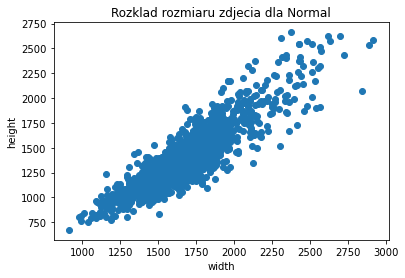

In [76]:
plt.scatter(width, height)
plt.title('Rozklad rozmiaru zdjecia dla Normal')
plt.xlabel('width')
plt.ylabel('height')
plt.savefig("zhong_size.png")
plt.show()

In [78]:
width = []
height = []
for i in range(len(Pneumonia)):
    im = Image.open(Pneumonia[i])
    im
    width1, height1 = im.size
    width.append(width1)
    height.append(height1)
    print(f'Zdjęcie nr {i}: szerokość {width}, wysokość {height}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Zdjęcie nr 789: szerokość [1152, 848, 992, 1152, 1136, 1264, 1272, 1136, 1024, 1144, 832, 904, 1128, 1048, 968, 1136, 1508, 1288, 1152, 1000, 1000, 1320, 1696, 1064, 1288, 457, 1428, 1080, 1496, 1006, 1192, 1128, 1206, 1192, 1176, 1164, 1008, 958, 1088, 1096, 952, 968, 1592, 928, 1368, 1328, 1488, 1280, 1064, 1362, 1032, 896, 976, 1720, 1824, 1416, 888, 1096, 1368, 1184, 1292, 1534, 1664, 1360, 1322, 1404, 1284, 944, 1008, 1040, 1248, 1280, 736, 1400, 1544, 2637, 1216, 1240, 1400, 1000, 1392, 1144, 1184, 1192, 1144, 855, 1896, 824, 1936, 1128, 984, 482, 1032, 1690, 1552, 967, 824, 1016, 1214, 1032, 1144, 1240, 856, 872, 1064, 1000, 1072, 928, 1144, 1304, 1384, 781, 790, 711, 1208, 1276, 1222, 1944, 1984, 896, 679, 1480, 1616, 1312, 1218, 896, 1016, 1000, 1106, 1792, 1392, 1248, 1450, 1080, 1200, 1552, 1416, 1040, 718, 527, 1800, 1712, 1000, 1176, 904, 1256, 1368, 848, 1470, 1460, 1184, 1384, 1384, 896, 1006, 1152, 1072, 1176, 1744, 1576, 1464, 1016, 1000, 1416, 1126, 1392, 1248, 976, 1

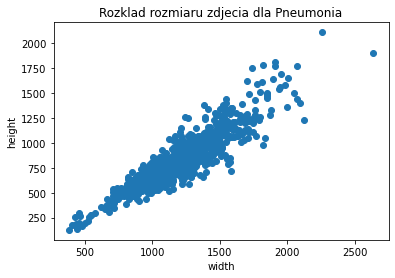

In [80]:
plt.scatter(width, height)
plt.title('Rozklad rozmiaru zdjecia dla Pneumonia')
plt.xlabel('width')
plt.ylabel('height')
plt.savefig("zhong_size.png")
plt.show()

Dla siim:

Wszystkie zdjęcia są 1024 na 1024

różnice pomiędzy zbiorem treningowym a testowym

Zhong - brak podziału na treningowy i testowy, 
siim - nie ma znaczących różnic

jakość danych - oceńcie wspólnie w skali od 1 do 5 i uzasadnijcie

- 2 dla Zhong, nie posiadam, żadnych danych na temat zdjec jedynie podzielone 2 foldery, w Pneumonia mam duzo zdjec rozmazanych, zdjecia mają roznorodne rozmiary 
- 

czy są jakieś skale pewności np. annotacji?

nie mam tego

# ANALIZA OBRAZÓW

czy po histogramie można rozróżnić, z której klasy jest dane zdjęcie? wygenerować histogram wraz z odchyleniami od średniej dla każdej klasy

dla Zhang

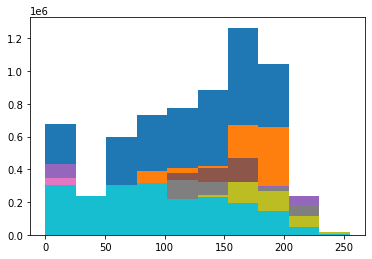

In [121]:
for i in range (10):
    img = cv2.imread(Normal[i],0)
    plt.hist(np.ravel(img))

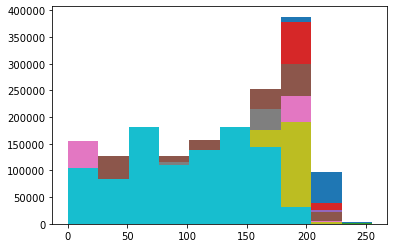

In [120]:
for i in range (10):
    img = cv2.imread(Pneumonia[i],0)
    plt.hist(np.ravel(img))

dla siim:

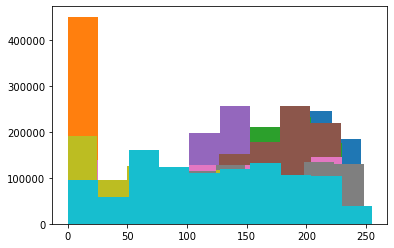

In [122]:
for i in range (10):
    img =  pydicom.dcmread(train_fns[i]).pixel_array
    plt.hist(np.ravel(img))

jeśli są dane tego samego pacjenta z różnych dni to zmierzyć różnicę pomiędzy obrazami.

nie mamy

jakie są wartości pikseli w obrazach, czy w przedziale 0-1, czy 0-255, czy może inny zakres? czy każde zdjęcie ma wartości skrajne? jak sądzicie dlaczego tak jest?

w zhong:

biore przykladowe zdjecie

In [81]:
import cv2 as cv

zdj = cv2.imread(Normal[1])


In [82]:
xray_image = zdj
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  128.9182897361231
The median pixel value is:  143.0


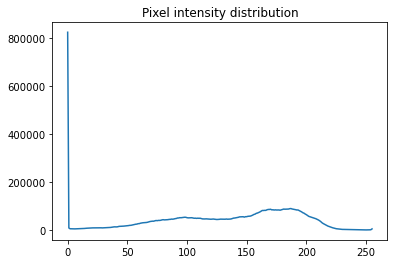

In [88]:
from scipy import ndimage
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

Typ danych tablicy to uint8, a wyniki wartości minimalnej/maksymalnej sugerują, że wszystkie 256 kolorów (od 0 do 255) jest używanych w promieniowaniu rentgenowskim. Wizualizacja potwierdzila

dla siim:

In [91]:
zdj = pydicom.dcmread(train_fns[3]).pixel_array

xray_image = zdj
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  125.84577751159668
The median pixel value is:  134.0


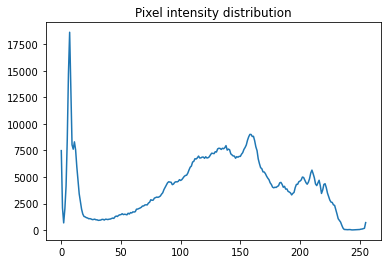

In [92]:
from scipy import ndimage
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

Wyniki wartości minimalnej/maksymalnej sugerują, że wszystkie 256 kolorów (od 0 do 255) jest używanych w promieniowaniu rentgenowskim. Wizualizacja potwierdzila

czy są zdjęcia z dziwnie przesuniętym histogramem?

nałożenie maski na zdjęcie - zdjęcie w skali szarości, żółte granice maski (jeśli więcej niż 1 rodzaj masek to różne kolory obwodów masek)

- Zhang nie ma masek

siim:

### te nakladanie masek

In [54]:
missing = 0
multiple = 0
patients_data = []
for k,paths in enumerate(train_fns):
    patient = {}
    img_id = paths.split('\\')[-1]
    data = pydicom.dcmread(paths)
    try:
        tmp = df[df['ImageId'] == '.'.join(img_id.split('.')[:-1])]
        
        if tmp.shape[0] > 1: 
            multiple += 1
        rle = tmp[' EncodedPixels'].values
        if rle[0] == '-1':
            pixels = rle[0]
        else:    
            pixels = [i for i in rle]
        
        patient["UID"] = data.SOPInstanceUID
        patient['EncodedPixels'] = pixels
        patient["Age"] = data.PatientAge
        patient["Sex"] = data.PatientSex
        patient["Modality"] = data.Modality
        patient["BodyPart"] = data.BodyPartExamined
        patient["ViewPosition"] = data.ViewPosition
        patient["filepath"] = paths
        patients_data.append(patient)
    except:
        missing += 1

In [55]:
df_patients = pd.DataFrame(patients_data, columns=["UID", "EncodedPixels", "Age", 
                            "Sex", "Modality", "BodyPart", "ViewPosition", "filepath"])

df_patients['Pneumothorax'] = df_patients['EncodedPixels'].apply(lambda x:0 if x == '-1' else 1)
df_patients['Pneumothorax'] = df_patients['Pneumothorax'].astype('int')
df_patients.head() 

,UID,EncodedPixels,Age,Sex,Modality,BodyPart,ViewPosition,filepath,Pneumothorax
0,1.2.276.0.7230010.3.1.4.8323329.1000.151787516...,-1,38,M,CR,CHEST,PA,C:/Users/maaja/Desktop/AndrzejczukMaja/archive...,0
1,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,-1,10,F,CR,CHEST,AP,C:/Users/maaja/Desktop/AndrzejczukMaja/archive...,0
2,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,-1,50,F,CR,CHEST,AP,C:/Users/maaja/Desktop/AndrzejczukMaja/archive...,0
3,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,-1,68,F,CR,CHEST,AP,C:/Users/maaja/Desktop/AndrzejczukMaja/archive...,0
4,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,-1,65,M,CR,CHEST,AP,C:/Users/maaja/Desktop/AndrzejczukMaja/archive...,0


In [96]:
def rle2mask(rles, width, height):
    mask= np.zeros(width* height)
    for rle in rles:
        array = np.asarray([int(x) for x in rle.split()])
        starts = array[0::2]
        lengths = array[1::2]

        current_position = 0
        for index, start in enumerate(starts):
            current_position += start
            mask[current_position:current_position+lengths[index]] = 255
            current_position += lengths[index]

    return mask.reshape(width, height).T

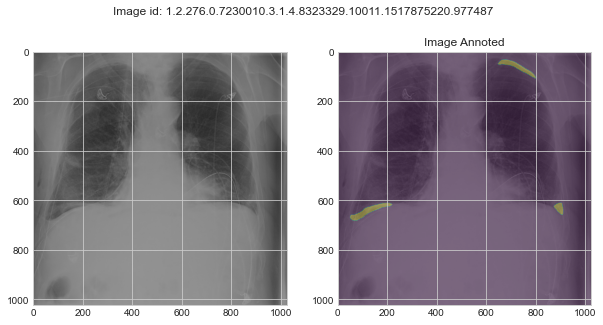

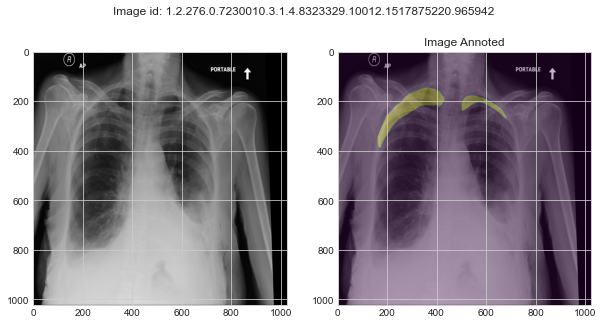

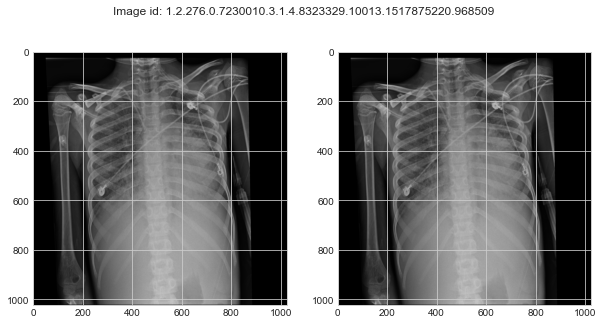

In [137]:
for file in train_fns[13:16]:
    data = pydicom.dcmread(file)
    image = data.pixel_array
    id_ = '.'.join(file.split('\\')[-1].split('.')[:-1])
    rle = df[df['ImageId'] == str(id_)][' EncodedPixels'].values
    if rle[0] == '-1':
        fig,axes = plt.subplots(1,2,figsize=(10,5))
        axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB),cmap='bone')
        axes[1].imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB),cmap='bone')
        plt.suptitle(f'Image id: {id_}')
        plt.show()
    else:
        fig,axes = plt.subplots(1,2,figsize=(10,5))
        axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB),cmap='bone')
        mask = rle2mask(rle,image.shape[0],image.shape[1])
        axes[1].imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB),cmap='bone')
        axes[1].imshow(mask,alpha=0.3,cmap='viridis')
        axes[1].set_title('Image Annoted')
        plt.suptitle(f'Image id: {id_}')
        plt.show()

rozmiar zmiany chorobowej w stosunku do wielkości zdjęcia

- Zhong nie mam zaznaczonych zmian
- siim mam wszystkie zdjecia tej samej wielkości

najczęstsza lokalizacja zmiany

In [127]:
def load_img_shapes(path_to_img):
    return cv2.imread(path_to_img).shape

In [128]:
def load_img(path_to_img):
    img = cv2.imread(path_to_img)
    return img

czy wszystkie zdjęcia są monochrome2 lub monochrome1?

Zhong: monochrome 1
siim: monochrome 2

czy wszystkie zdjęcia są dla pacjentów w pionie?

tak, tak 

czy są zdjęcia nie na środku okna (np. mocno z boku lub dołu)

nie raczej

# ZALEŻNOŚCI

czy AP u chorych, PA u zdrowych?

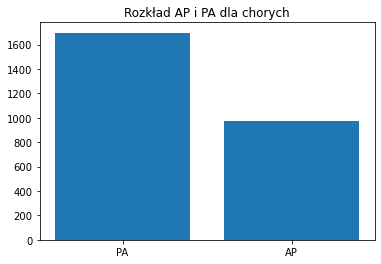

In [57]:
non_healthy = df_patients[df_patients['Pneumothorax'] == 1]
a = non_healthy['ViewPosition'].value_counts()

x = list(a.index)
y = list(a)

plt.bar(x, y)
plt.title("Rozkład AP i PA dla chorych")
plt.show()

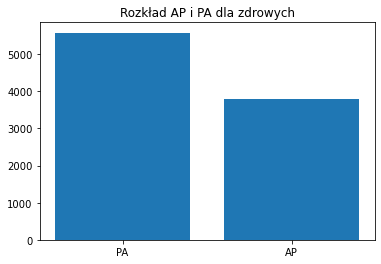

In [59]:
healthy = df_patients[df_patients['Pneumothorax'] == 0]
a = healthy['ViewPosition'].value_counts()

x = list(a.index)
y = list(a)

plt.bar(x, y)
plt.title("Rozkład AP i PA dla zdrowych")
plt.show()

zależność wieku od choroby

C:\Users\maaja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maaja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maaja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

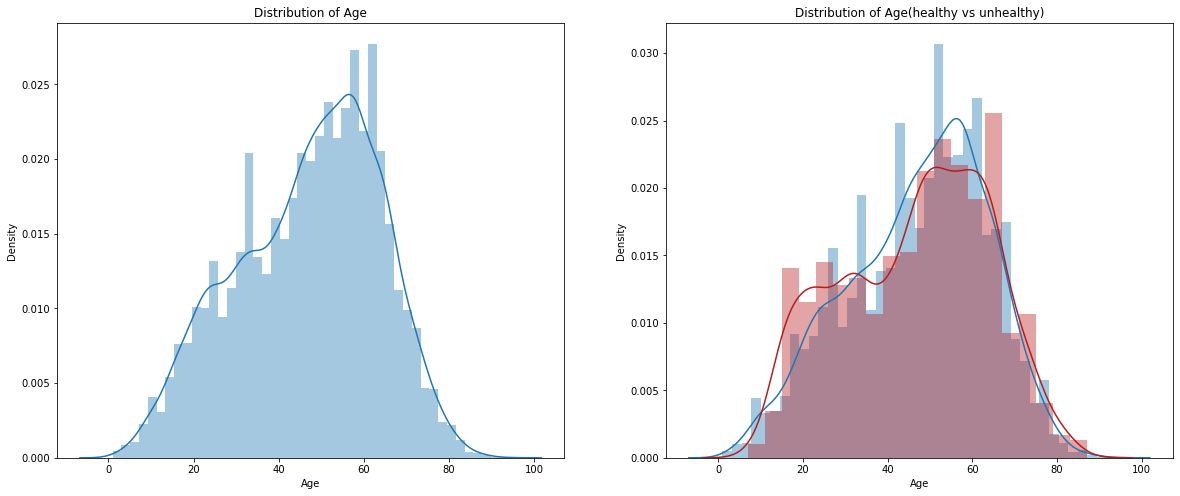

In [38]:
df_patients = df_patients.drop(df_patients[df_patients['Age'] > 100].index)
non_healthy = df_patients[df_patients['Pneumothorax'] == 1] 
healthy = df_patients[df_patients['Pneumothorax'] == 0]

df_patients['Age'] = df_patients['Age'].astype('int') 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.distplot(df_patients['Age'],ax=axes[0])
axes[0].title.set_text('Distribution of Age')
sns.distplot(healthy['Age'],ax=axes[1])
sns.distplot(non_healthy['Age'],ax=axes[1],color='#B71C1C')
axes[1].title.set_text('Distribution of Age(healthy vs unhealthy)')
plt.show()

# RESZTA

podobieństwo zdjęć w tej samej klasy pomiędzy bazami danych <- wrzuć 10 zdjęć o rozdzielczości ...x... i sprawdź podobieństwo